In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
my_data = np.genfromtxt('train.csv', delimiter = ',', skip_header = 1, dtype = 'int32')

In [3]:
print my_data

[[1 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [1 0 0 ..., 0 0 0]
 ..., 
 [7 0 0 ..., 0 0 0]
 [6 0 0 ..., 0 0 0]
 [9 0 0 ..., 0 0 0]]


In [4]:
print my_data.shape
labels = my_data[:, 0]
digits = my_data[:, 1:]

(42000, 785)


In [5]:
print labels
print digits

[1 0 1 ..., 7 6 9]
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [6]:
firstDigit = digits[0, :]
print firstDigit.size

784


In [7]:
toplot = np.reshape(firstDigit, (28, 28));

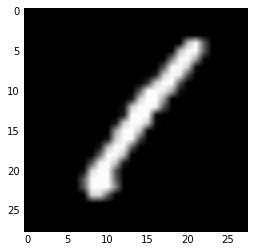

In [8]:
plt.imshow(toplot, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
plt.show()

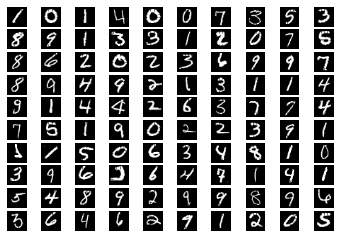

In [9]:
fig = plt.figure()
for i in range(10):
    for j in range(10):
        ax = plt.subplot2grid((10, 10), (i, j))
        plt.setp(ax.get_yticklabels(), visible = False)
        plt.setp(ax.get_xticklabels(), visible = False)
        digit = digits[i * 10 + j, :]
        toplot = np.reshape(digit, (28, 28))
        ax.imshow(toplot, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 255)
plt.show()

In [10]:
from sklearn import tree

In [11]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(digits, labels)

In [12]:
test = np.genfromtxt('test.csv', delimiter = ',', skip_header = 1, dtype = 'int32')

In [14]:
# predict now
pred = clf.predict(digits)
print pd.crosstab(labels, pred)
testpred = clf.predict(test)

col_0     0     1     2     3     4     5     6     7     8     9
row_0                                                            
0      4132     0     0     0     0     0     0     0     0     0
1         0  4684     0     0     0     0     0     0     0     0
2         0     0  4177     0     0     0     0     0     0     0
3         0     0     0  4351     0     0     0     0     0     0
4         0     0     0     0  4072     0     0     0     0     0
5         0     0     0     0     0  3795     0     0     0     0
6         0     0     0     0     0     0  4137     0     0     0
7         0     0     0     0     0     0     0  4401     0     0
8         0     0     0     0     0     0     0     0  4063     0
9         0     0     0     0     0     0     0     0     0  4188


In [17]:
print sum(labels == pred) / labels.size * 100

100


In [18]:
print testpred

[2 2 9 ..., 3 4 2]


In [21]:
pd.DataFrame({"ImageId": list(range(1,len(testpred)+1)), "Label": testpred}).to_csv('submission.csv', index=False, header=True)